## Creating Histograms

In the cells below I import packages, import the summary citation dataset, and create indicator variables for external and abrupt patents. Then histograms and summary statistics are created for the following categories: internal incremental, internal abrupt, and external abrupt.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Setting plot colors
cmap1 = matplotlib.cm.get_cmap('summer')
%matplotlib notebook

In [2]:
#Loading data as a pandas dataset
data2 = pd.read_csv('cit_external_comn_share.csv', sep = ',', header = 0, index_col = 0)
#Deleting patents before 1976
data2 = data2[data2.appyear > 1975]

C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
abr_cut = 0.1
data2['external_share'] = data2.external_share.replace(np.nan, -1)
level = np.rint(np.size(data2['tot_cit_correct'].dropna())
                                                   - abr_cut * np.size(data2['tot_cit_correct'].
                                                                   dropna()))
cutoff = np.sort(data2['tot_cit_correct'].dropna())[int(level)]
cutoff

10.6616

In [4]:
#This function will be used to determine whether a patent is abrupt or incremental.
#A patent at the top 10% of expected citations is set to be aprupt

def abrupt(cites, cutoff):
    #The cutoff value that defines an abrupt innovation can be adjusted
    if cites >= cutoff:
        return 0
    else:
        return 1
    
#Creating a new column for the indicator variable 'incremental'
data2['Increment'] = data2['tot_cit_correct'].apply(abrupt, cutoff = cutoff)
data2['tot_abr_inc_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_correct']
data2['tot_abr_class_cit_correct'] = data2['tot_cit_correct'] - data2['tot_external_class_correct']

#Defining External Patents
#The definition will depend on the share of citations that are external.
#That variable has many missing values for patents with no citations. This line replaces
#those missing values with -1. 
data2['external_share'] = data2.external_share.replace(np.nan, -1)
#Now I define a function to determine whether a patent is external
def external(cites):
    cutoff = 0.5
    if cites >= cutoff:
        return 1
    else:
        return 0
data2['External'] = data2['external_share'].apply(external)
print(np.mean(data2['Increment']))

0.899991542938089


In [5]:
print(np.size(data2[data2.External == 1]))
print(np.size(data2[data2.External == 0]))

8709180
29129020


<IPython.core.display.Javascript object>


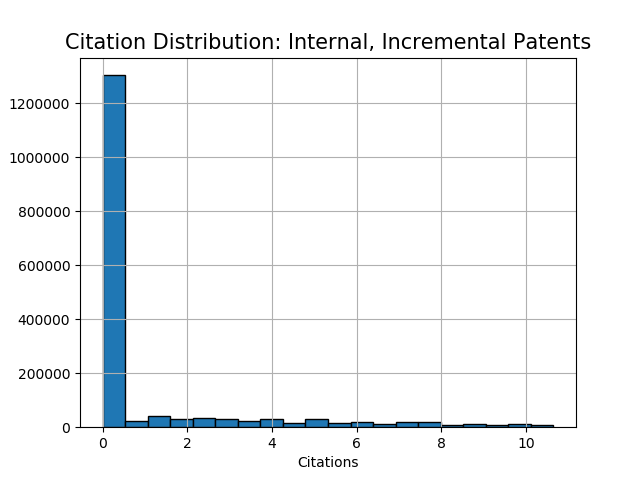

Total, mean, standard deviation: 1702703 , 1.0452714309813296 , 2.293187572379963


<IPython.core.display.Javascript object>


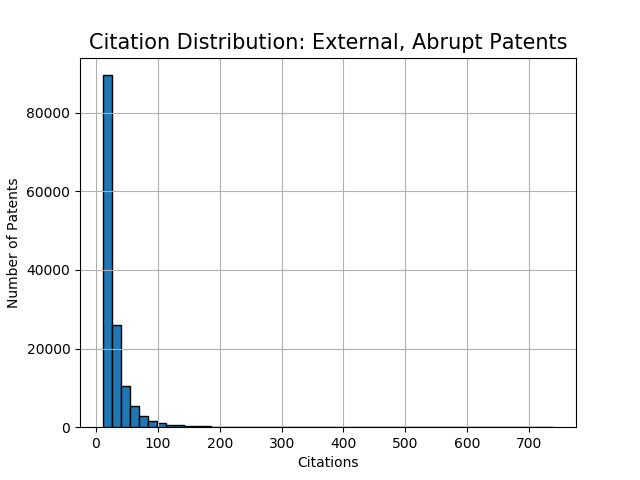

Total, mean, standard deviation: 139227 , 28.339301601706214 , 27.29738437627662


<IPython.core.display.Javascript object>


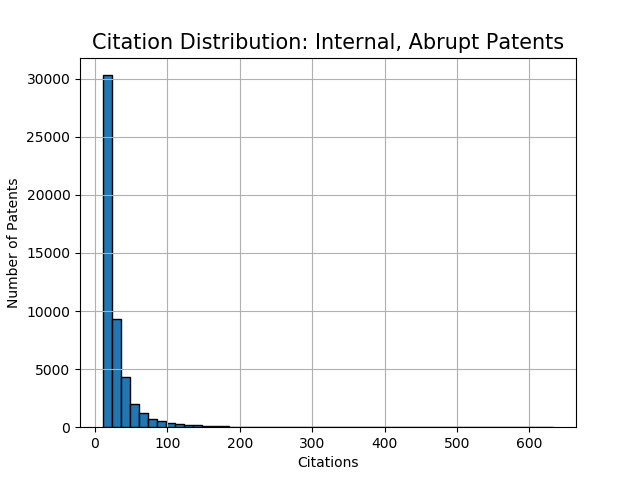

Total, mean, standard deviation: 49980 , 28.811253965590097 , 28.92134667414797


<IPython.core.display.Javascript object>


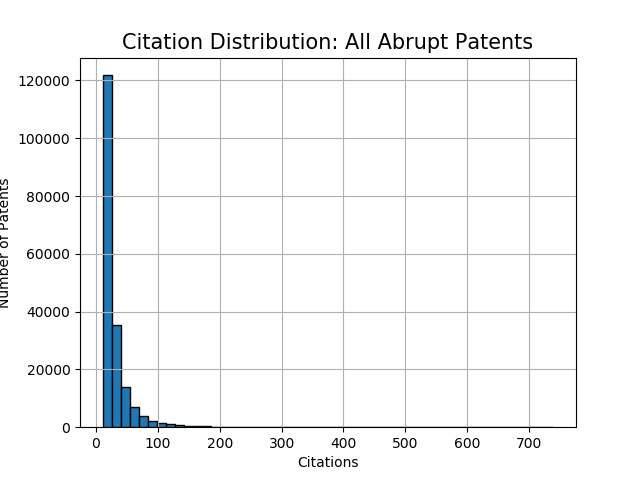

Total, mean, standard deviation: 189207 , 28.463970240531847 , 27.736385607322156


<IPython.core.display.Javascript object>


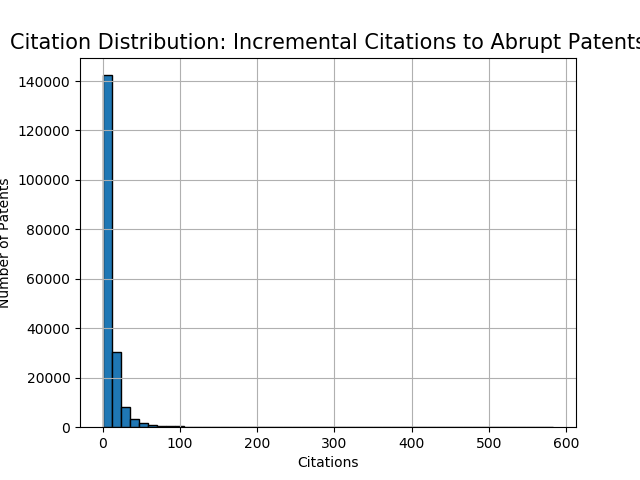

Total, mean, standard deviation: 189207 , 8.850634295773176 , 16.309264325805366


<IPython.core.display.Javascript object>


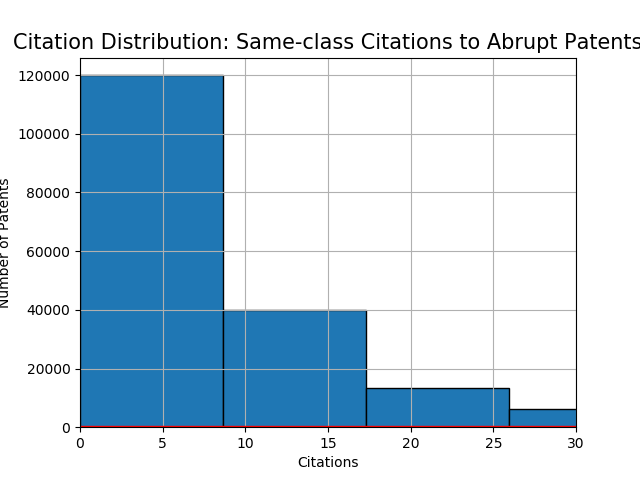

Total, mean, standard deviation: 189207 , 10.06398987669824 , 18.42557679906264
Summary Statistics for "External, incremental patents: 
Total, mean, standard deviation: 296232 , 4.47239161219741 , 2.6815898976775547


In [6]:
#data3 = data2[data2.icl_class == 'G01N']
#data3.hist(column = 'appyear')

#Plotting internal incremental innovation
#Eliminated observations that are not internal incremental
data3 = data2[data2.Increment == 1]
data3.hist(column = 'tot_cit_correct', bins = 20, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Incremental Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
#Printing out summary statistics
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#External Abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 1)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: External, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Internal abrupt innovation
data3 = data2[(data2.Increment == 0) & (data2.External == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Internal, Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total abrupt innovation
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: All Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

#Total incremental citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_inc_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Incremental Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_abr_inc_cit_correct),',',
      np.std(data3.tot_abr_inc_cit_correct))

#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', bins = 50, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(
    data3.tot_abr_class_cit_correct),',', np.std(data3.tot_abr_class_cit_correct))

#Printing the amount of observations that would be "external incremental"
data3 = data2[(data2.Increment == 1) & (data2.External == 1)]
print('Summary Statistics for "External, incremental patents: ')
print('Total, mean, standard deviation:', len(data3), ',', np.mean(data3.tot_cit_correct),',',
      np.std(data3.tot_cit_correct))

## Testing how varying the Parameters affects the distribution (can be used to choose moments)

1.0


<IPython.core.display.Javascript object>


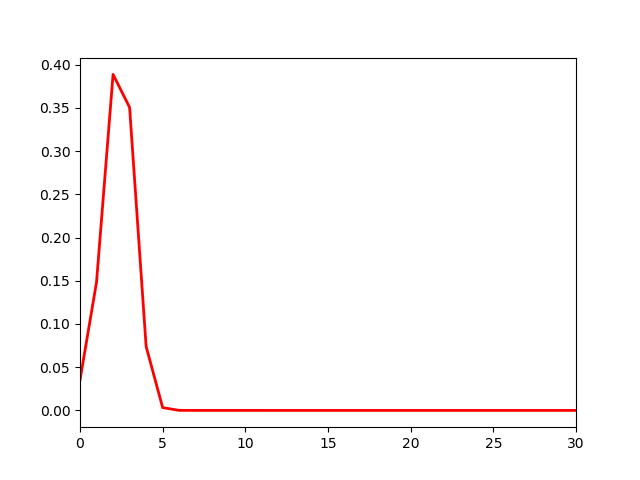

(0, 30)

In [120]:
def pdf_eta2(lambda_inc_0, alpha, tau_lambda_int_abr, ndim):
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0] + tau_lambda_int_abr)
    #eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0])
    eta_k_mod = [None] * ndim
    eta_k_mod[0] = eta_0
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_k_mod[i-1] * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))
    '''
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_0 * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))**i
    '''
    return eta_k_mod
ndim = 750
lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test = 5.5, .2, .2
print(np.sum(pdf_eta2(lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test, ndim)))

dist_pts = np.arange(ndim)
plt.figure(7)
plt.plot(dist_pts, pdf_eta2(lamda_inc_0_test, alpha_test, tau_lamda_int_abr_test, ndim),
         linewidth=2, color='r')
plt.xlim([0, 30])

## Estimation

In [9]:
def pdf_eta(lambda_inc_k, tau_lambda_int_abr):
    
    eta_0 = (tau_lambda_int_abr)/(lambda_inc_k[0] + tau_lambda_int_abr)
    eta_k_mod = [None] * len(lambda_inc_k)
    eta_k_mod[0] = eta_0
    for i in range(1, np.size(lambda_inc_k)):
        eta_k_mod[i] = eta_k_mod[i-1] * ((lambda_inc_k[i-1])/(lambda_inc_k[i] + tau_lambda_int_abr))
    
    return eta_k_mod

In [10]:
def model_moments(lambda_inc_k, tau_lambda_int_abr):
    
    eta_k_mod = pdf_eta(lambda_inc_k, tau_lambda_int_abr)
#    lambda_inc_mod = np.dot(eta_k_mod, lambda_inc_k)
    eta_k_mean_mod = np.dot(eta_k_mod, np.arange(len(lambda_inc_k)))
    eta_k_var_mod = np.dot(np.multiply(np.arange(len(lambda_inc_k)) - eta_k_mean_mod,
                                     np.arange(len(lambda_inc_k)) - eta_k_mean_mod), eta_k_mod)
    bpct_4_mod = np.dot(eta_k_mod[0:20], np.linspace(0, 19, 20))
#    eta_k_ske_mod = np.dot(np.multiply(np.multiply(((np.linspace(0, 15490, 15491) - eta_k_mean_mod)/eta_k_var_mod),
#                                    ((np.linspace(0, 15490, 15491) - eta_k_mean_mod)/eta_k_var_mod)),
#                                     ((np.linspace(0, 15490, 15491) - eta_k_mean_mod)/eta_k_var_mod))
#                         , eta_k_mod)
    bpct_5_mod = np.dot(eta_k_mod[20:40], np.linspace(20, 39, 20))
    
    return eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod

def data_moments(xvals):
    
    unique, counts = np.unique(xvals, return_counts=True)
    eta_k_data = counts / np.size(np.array(xvals))
#    seq = np.linspace(0, 15490, 15491)
#    lambda_inc_k_data = np.array(0.8 * 0.95**seq)
#    lambda_inc_data = np.dot(eta_k_data, lambda_inc_k_data)
    bpct_4_data = np.dot(eta_k_data[0:20], np.linspace(0, 19, 20))
    bpct_5_data = np.dot(eta_k_data[20:40], np.linspace(20, 39, 20))
    
    return np.mean(xvals), np.var(xvals), bpct_4_data, bpct_5_data

def err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple):
    
    eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod = model_moments(
        lambda_inc_k, tau_lambda_int_abr)
    moms_mod = np.array([[eta_k_mean_mod], [eta_k_var_mod], [bpct_4_mod], [bpct_5_mod]])
    eta_k_mean_data, eta_k_var_data, bpct_4_data, bpct_5_data = data_moments(xvals)
    moms_data = np.array([[eta_k_mean_data], [eta_k_var_data], [bpct_4_data], [bpct_5_data]])
    if simple:
        err_vec = moms_mod - moms_data
    else:
        err_vec = (moms_mod - moms_data) / moms_data
    
    return err_vec

def crit_abr_distr(params, *args):
    
    tau_lambda_int_abr, lambda_inc_0, alpha = params
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    err = err_vec(xvals, lambda_inc_k, tau_lambda_int_abr, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [128]:
cit_abr = data2[(data2.Increment == 0)]
abr_dist_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna().value_counts()) / np.size(
    np.array(cit_abr.tot_abr_class_cit_correct.dropna()))
np.size(abr_dist_data)
np.max(cit_abr.tot_cit_correct)
print(np.mean(abr_dist_data))
print(np.mean(cit_abr.tot_abr_class_cit_correct))

6.45536117746e-05
10.06398987669824


In [60]:
tau_lambda_int_abr_init = 8
lambda_inc_0_init = .0636
alpha_init = .999
W_hat = np.eye(4)
#W_hat = np.diag((1000000,100,1))
params_init = np.array([tau_lambda_int_abr_init, lambda_inc_0_init, alpha_init])
bnds = ((1e-5, None),(1e-5, None),(0.5, 1-1e-5))
ndim = 750 #This is the number of dimensions that we will sum over. I use 750 because 741 is the maximum in the data.
Est_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (Est_data, W_hat, ndim)

results_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
tau_lambda_int_abr_GMM, lambda_inc_0_GMM, alpha_GMM = results_abr_distr.x
print('tau_lambda_int_abr_GMM=', tau_lambda_int_abr_GMM, 'lambda_inc_0_GMM=', lambda_inc_0_GMM,
      'alpha_GMM=', alpha_GMM)
print(results_abr_distr.fun)

tau_lambda_int_abr_GMM= 7.99968356859 lambda_inc_0_GMM= 0.103388174023 alpha_GMM= 0.999005356742
[[ 2.99735801]]


In [25]:
results_abr_distr

      fun: array([[ 2.99735801]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.00000000e+00,   4.44089210e-08,  -3.99680289e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 16
      nit: 2
   status: 0
  success: True
        x: array([ 4.75054577,  0.06139647,  0.99889571])

In [61]:
seq = np.arange(ndim)
lambda_inc_k_GMM = np.array(lambda_inc_0_GMM * alpha_GMM**seq)
eta_k_mean_data, eta_k_var_data, bpct_4_data, bpct_5_data = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod, eta_k_var_mod, bpct_4_mod, bpct_5_mod = model_moments(lambda_inc_k_GMM,
                                                              tau_lambda_int_abr_GMM)

err1 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM, tau_lambda_int_abr_GMM, False).reshape(4,)
print('eta_k_mean_mod = ', eta_k_mean_mod, 'eta_k_var_mod = ', eta_k_var_mod,
      'bpct_4_mod = ', bpct_4_mod, 'bpct_5_mod = ', bpct_5_mod)
print('eta_k_mean_data = ', eta_k_mean_data, 'eta_k_var_data = ', eta_k_var_data,
      'bpct_4_data = ', bpct_4_data, 'bpct_5_data = ', bpct_5_data)
print('Error vector=', err1)

eta_k_mean_mod =  0.0129235327951 eta_k_var_mod =  0.0130898778421 bpct_4_mod =  0.0129235327951 bpct_5_mod =  1.80078346296e-37
eta_k_mean_data =  10.0639898767 eta_k_var_data =  339.501880378 bpct_4_data =  0.012906499231 bpct_5_data =  0.053496963643
Error vector= [-0.99871586 -0.99996144  0.00131977 -1.        ]


In [62]:
sum_eta = np.sum(pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM))
lambda_inc_GMM = np.dot(pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM), lambda_inc_k_GMM)
print(sum_eta, lambda_inc_GMM, tau_lambda_int_abr_GMM)

0.999999836155 0.103386828118 7.99968356859


<IPython.core.display.Javascript object>


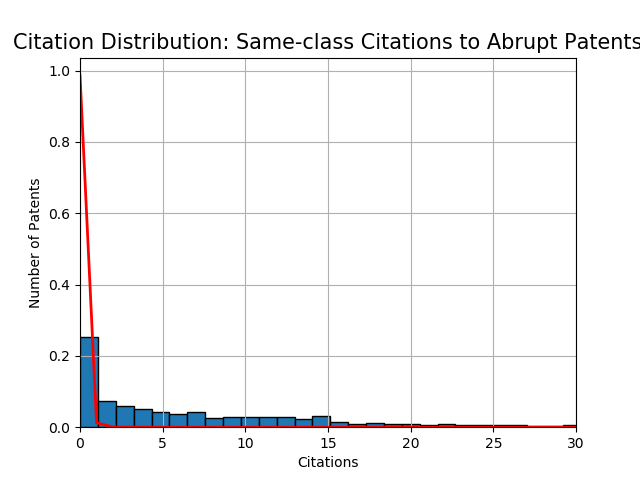

(0, 30)

In [63]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM, tau_lambda_int_abr_GMM),
         linewidth=2, color='r')
plt.xlim([0, 30])

In [65]:
err1 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM, tau_lambda_int_abr_GMM, False)
VCV2 = np.dot(err1, err1.T) / np.size(np.array(cit_abr.tot_abr_class_cit_correct.dropna()))
print(VCV2)
W_hat2 = lin.pinv(VCV2)  # Use the pseudo-inverse calculated by SVD because VCV2 is ill-conditioned
print(W_hat2)

[[  5.27165156e-06   5.27822627e-06  -6.96629428e-09   5.27842978e-06]
 [  5.27822627e-06   5.28480917e-06  -6.97498252e-09   5.28501294e-06]
 [ -6.96629428e-09  -6.97498252e-09   9.20570252e-12  -6.97525146e-09]
 [  5.27842978e-06   5.28501294e-06  -6.97525146e-09   5.28521672e-06]]
[[  2.10060241e+04   2.10322224e+04  -2.77586908e+01   2.10330334e+04]
 [  2.10322224e+04   2.10584534e+04  -2.77933109e+01   2.10592654e+04]
 [ -2.77586908e+01  -2.77933109e+01   3.66820923e-02  -2.77943825e+01]
 [  2.10330334e+04   2.10592654e+04  -2.77943825e+01   2.10600774e+04]]


In [72]:
#params_init = np.array([tau_lambda_int_abr_GMM - 9.3, lambda_inc_0_GMM, alpha_GMM])
params_init = np.array([tau_lambda_int_abr_GMM, lambda_inc_0_GMM, alpha_GMM])
bnds = ((1e-5, None),(1e-5, None),(1e-5, 1-1e-5))
ndim = 750
gmm_args = (np.array(cit_abr.tot_abr_class_cit_correct.dropna()), W_hat2, ndim)
results2_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results2_abr_distr = opt.minimize(crit_abr_distr, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
tau_lambda_int_abr_GMM2, lambda_inc_0_GMM2, alpha_GMM2 = results2_abr_distr.x
print('tau_lambda_int_abr_GMM2=', tau_lambda_int_abr_GMM2, 'lambda_inc_0_GMM2=', lambda_inc_0_GMM2,
      'alpha_GMM2=', alpha_GMM2)
print(results2_abr_distr.fun)

tau_lambda_int_abr_GMM2= 7.20368305255 lambda_inc_0_GMM2= 25.4055083984 alpha_GMM2= 0.999989999762
[[  4.54689747e-12]]


Note: The lowest criterion value I've found so far is 4.55e-12. This was with parameter values (7.204, 25.405, 0.9999)

In [180]:
results2_abr_distr

      fun: array([[  1.73445277e-10]])
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  5.43830416,   0.13147786,  17.90564155])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 188
      nit: 5
   status: 0
  success: True
        x: array([ 0.0851964 ,  0.36552169,  0.99159991])

In [73]:
seq = np.arange(ndim)
lambda_inc_k_GMM2 = np.array(lambda_inc_0_GMM2 * alpha_GMM2**seq)
eta_k_mean_data2, eta_k_var_data2, bpct_4_data2, bpct_5_data2 = data_moments(np.array(
    cit_abr.tot_abr_class_cit_correct.dropna()))
eta_k_mean_mod2, eta_k_var_mod2, bpct_4_mod2, bpct_5_mod2 = model_moments(lambda_inc_k_GMM2,
                                                                 tau_lambda_int_abr_GMM2)

err2 = err_vec(np.array(cit_abr.tot_abr_class_cit_correct.dropna())
               , lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2, False).reshape(4,)
print('eta_k_mean_mod2 = ', eta_k_mean_mod2, 'eta_k_var_mod2 = ', eta_k_var_mod2,
      'bpct_4_mod2 = ', bpct_4_mod2, 'bpct_5_mod2 = ', bpct_5_mod2)
print('eta_k_mean_data2 = ', eta_k_mean_data2, 'eta_k_var_data2 = ', eta_k_var_data2,
      'bpct_4_data2 = ', bpct_4_data2, 'bpct_5_data2 = ', bpct_5_data2)
print('Error vector=', err2)

eta_k_mean_mod2 =  3.52626884646 eta_k_var_mod2 =  15.9589316736 bpct_4_mod2 =  3.36673905088 bpct_5_mod2 =  0.157531800116
eta_k_mean_data2 =  10.0639898767 eta_k_var_data2 =  339.501880378 bpct_4_data2 =  0.012906499231 bpct_5_data2 =  0.053496963643
Error vector= [  -0.64961522   -0.9529931   259.85609975    1.94468675]


<IPython.core.display.Javascript object>


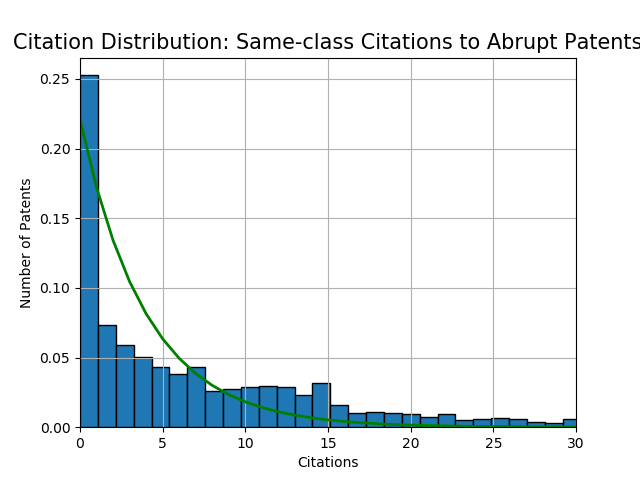

In [74]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2),
         linewidth=2, color='g')

In [75]:
sum_eta = np.sum(pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2))
lambda_inc_GMM2 = np.dot(pdf_eta(lambda_inc_k_GMM2, tau_lambda_int_abr_GMM2), lambda_inc_k_GMM2)
print(sum_eta, lambda_inc_GMM2, tau_lambda_int_abr_GMM2)

0.999972527012 25.4039145769 7.20368305255


### Maximum Likelihood Estimation
Two estimations are done below. First is the normal MLE with all three parameters. Next alpha is fixed at 1.0 and the other two parameters are estimated using MLE. The results seem to be similar.

In [81]:
def log_lik(xvals, lambda_inc_k, alpha, tau_lambda_int_abr):
    lik_array = np.zeros(len(xvals))
    pmf = pdf_eta(lambda_inc_k, tau_lambda_int_abr)
    rounded = np.round(xvals)
    for n in range(0, len(xvals)):
        lik_array[n] = pmf[np.int(rounded[n])]
    
    lik_array[lik_array < 1e-20] = 1e-20
    loglik_array = np.log(lik_array)
    
    return np.sum(loglik_array)

def crit_log_lik(params, *args):
    tau_lambda_int_abr, lambda_inc_0, alpha = params
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    loglik = log_lik(xvals, lambda_inc_k, alpha, tau_lambda_int_abr)
    crit_val = -loglik
    print(params, crit_val)
    
    return crit_val

def crit_log_lik_noalpha(params, *args):
    tau_lambda_int_abr, lambda_inc_0 = params
    alpha = 1.0
    xvals, W, ndim = args
    seq = np.arange(ndim)
    lambda_inc_k = np.array(lambda_inc_0 * alpha**seq)
    loglik = log_lik(xvals, lambda_inc_k, alpha, tau_lambda_int_abr)
    crit_val = -loglik
    print(params, crit_val)
    
    return crit_val

In [79]:
#This cell does the normal log likelihood estimation
tau_lambda_int_abr_init = 1.5
lambda_inc_0_init = 0.5
alpha_init = 0.9
params_init = np.array([tau_lambda_int_abr_init, lambda_inc_0_init, alpha_init])
bnds = ((1e-5, None),(1e-5, None),(1e-5, 1-1e-5))
ndim = 750
W = np.eye(3)
MLE_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (MLE_data, W, ndim)

results_MLE = opt.minimize(crit_log_lik, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_MLE = opt.minimize(crit_log_lik, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
tau_lambda_int_abr_MLE, lambda_inc_0_MLE, alpha_MLE = results_MLE.x
print('tau_lambda_int_abr_MLE=', tau_lambda_int_abr_MLE, 'lambda_inc_0_MLE=', lambda_inc_0_MLE,
      'alpha_MLE=', alpha_MLE)
print('-log likelihood =', results_MLE.fun)

[ 1.5  2.5  0.9] 2122315.42143
[ 1.575  2.5    0.9  ] 2149627.10337
[ 1.5    2.625  0.9  ] 2094876.62896
[ 1.5    2.5    0.945] 1699357.53276
[ 1.425       2.58333333  0.93      ] 1801892.79049
[ 1.45        2.63888889  0.95      ] 1598199.59401
[ 1.425       2.70833333  0.975     ] 1294052.99611
[ 1.4         2.56944444  1.        ] 993705.694339
[ 1.35        2.54166667  1.05      ] 607671.702324
[ 1.425       2.58333333  1.05      ] 613724.081262
[ 1.3         2.72222222  1.105     ] 562217.805168
[ 1.2         2.83333333  1.185     ] 627893.35557
[ 1.29166667  2.52314815  1.16166667] 596767.650556
[ 1.20277778  2.60802469  1.16111111] 599607.396345
[ 1.17962963  2.69393004  1.23518519] 682683.28885
[ 1.30740741  2.57973251  1.0962963 ] 562552.705864
[ 1.39660494  2.60871056  1.0808642 ] 569456.939919
[ 1.3776749   2.75062872  1.02644033] 678297.261043
[ 1.31316872  2.58001829  1.12786008] 572455.956803
[ 1.35617284  2.69375857  1.06024691] 582446.278251
[ 1.32391975  2.60845336  1.

In [83]:
#This cell does log likelihood estimation for two parameters while alpha is fixed at one.
tau_lambda_int_abr_init = 1.5
lambda_inc_0_init = 2.5
params_init = np.array([tau_lambda_int_abr_init, lambda_inc_0_init])
bnds = ((1e-5, None),(1e-5, None),(1e-5, 1-1e-5))
ndim = 750
W = np.eye(3)
MLE_data = np.array(cit_abr.tot_abr_class_cit_correct.dropna())
gmm_args = (MLE_data, W, ndim)

results_MLE = opt.minimize(crit_log_lik, params_init, args=(gmm_args),
                                 method='L-BFGS-B', bounds = bnds)
'''
results_MLE = opt.minimize(crit_log_lik_noalpha, params_init, args=(gmm_args),
                                 method='Nelder-Mead')
'''
tau_lambda_int_abr_MLE, lambda_inc_0_MLE = results_MLE.x
alpha_MLE = 1.0
print('tau_lambda_int_abr_MLE=', tau_lambda_int_abr_MLE, 'lambda_inc_0_MLE=', lambda_inc_0_MLE,
      'alpha_MLE=', alpha_MLE)
print('-log likelihood =', results_MLE.fun)

[ 1.5  2.5] 1041580.17565
[ 1.575  2.5  ] 1067058.45045
[ 1.5    2.625] 1016934.32061
[ 1.425  2.625] 991937.394598
[ 1.35    2.6875] 955887.322803
[ 1.35    2.8125] 935748.323777
[ 1.275    2.96875] 889550.25
[ 1.125    3.03125] 835470.993727
[ 0.9375    3.234375] 760325.410258
[ 0.8625    3.515625] 720769.490347
[ 0.61875    3.9296875] 654639.615055
[ 0.28125    4.1953125] 647012.793396
[-0.215625    4.80859375] 8713304.3538
[-0.0375    4.890625] 8713304.3538
[ 0.69375    3.6484375] 676287.471065
[ 0.20625    4.4765625] 676477.811957
[ 0.571875    3.85546875] 649575.957277
[ 0.234375    4.12109375] 658112.199608
[ 0.52265625  3.97753906] 641754.474115
[ 0.23203125  4.31738281] 662618.589986
[ 0.48691406  3.97094727] 638694.302333
[ 0.72832031  3.75317383] 679170.095625
[ 0.39301758  4.08477783] 635058.779872
[ 0.35727539  4.07818604] 636307.313685
[ 0.26337891  4.1920166 ] 651018.111077
[ 0.43103027  4.0262146 ] 635424.212144
[ 0.46677246  4.0328064 ] 636873.81244
[ 0.38464966  4.066

In [84]:
print(results_MLE)
print(crit_log_lik((tau_lambda_int_abr_MLE, lambda_inc_0_MLE, 1.0), MLE_data, W, ndim))

 final_simplex: (array([[ 0.40378221,  4.05872973],
       [ 0.40377502,  4.05865748],
       [ 0.40377829,  4.0586902 ]]), array([ 634963.55835904,  634963.55835904,  634963.55835904]))
           fun: 634963.55835903622
       message: 'Optimization terminated successfully.'
          nfev: 98
           nit: 52
        status: 0
       success: True
             x: array([ 0.40378221,  4.05872973])
(0.40378221272688947, 4.0587297259356827, 1.0) 634963.558359
634963.558359


<IPython.core.display.Javascript object>


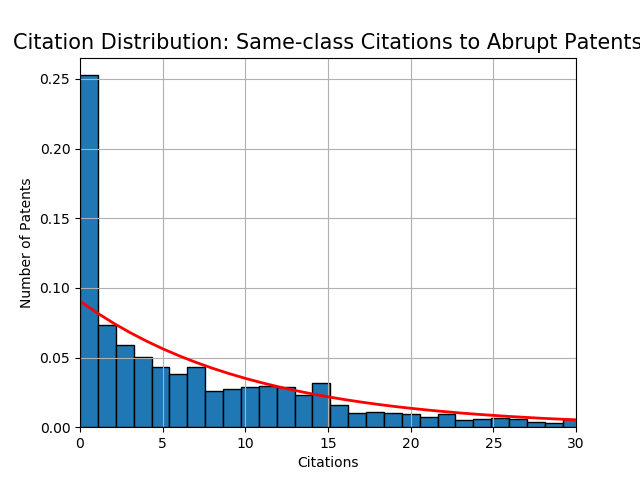

In [85]:
# Plot the histogram of the data
#Total same class citations to abrupt patents
data3 = data2[(data2.Increment == 0)]
data3.hist(column = 'tot_abr_class_cit_correct', normed=True, bins = 400, edgecolor = 'black')
plt.title('Citation Distribution: Same-class Citations to Abrupt Patents', fontsize=15)
plt.xlabel('Citations')
plt.ylabel('Number of Patents')
plt.xlim([0, 30])

# Plot the estimated GMM
dist_pts = np.arange(ndim)
plt.plot(dist_pts, pdf_eta2(lambda_inc_0_MLE, alpha_MLE, tau_lambda_int_abr_MLE, ndim),
         linewidth=2, color='r')

In [86]:
seq = np.arange(ndim)
lambda_inc_k_MLE = np.array(lambda_inc_0_MLE * alpha_MLE**seq)
sum_eta = np.sum(pdf_eta(lambda_inc_k_MLE, tau_lambda_int_abr_MLE))
lambda_inc_MLE = np.dot(pdf_eta(lambda_inc_k_MLE, tau_lambda_int_abr_MLE), lambda_inc_k_MLE)
print(sum_eta, lambda_inc_MLE, tau_lambda_int_abr_MLE)

1.0 4.05872972594 0.403782212727


### Robustness

In [168]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod = lambda_inc_GMM / (lambda_inc_GMM + tau_lambda_int_abr_GMM)

print('share_inc_data = ', share_inc_data, 'share_inc_mod = ', share_inc_mod)

#RD intensity
RD_intens_mod = 0.106 * 0.346 * (1 / (share_inc_mod)) * np.dot(pdf_eta(lambda_inc_k_GMM,
                                                                   tau_lambda_int_abr_GMM),
                                             np.multiply(lambda_inc_k_GMM, lambda_inc_k_GMM)
                                            ) / 0.075547

RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod = ', RD_intens_mod)

share_inc_data =  0.899991542938089 share_inc_mod =  0.0127613580386
RD_intens_data =  0.06797109 RD_intens_mod =  0.559896749467


In [184]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod2 = lambda_inc_GMM2 / (lambda_inc_GMM2 + tau_lambda_int_abr_GMM2)

print('share_inc_data = ', share_inc_data, 'share_inc_mod2 = ', share_inc_mod2)

#RD intensity
RD_intens_mod2 = 0.106 * 0.346 * (1 / (share_inc_mod2)) * np.dot(pdf_eta(lambda_inc_k_GMM2,
                                                                   tau_lambda_int_abr_GMM2),
                                             np.multiply(lambda_inc_k_GMM2, lambda_inc_k_GMM2)
                                            ) / 0.075547
RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod2 = ', RD_intens_mod2)

share_inc_data =  0.899991542938089 share_inc_mod2 =  0.897940032617
RD_intens_data =  0.06797109 RD_intens_mod2 =  0.066044797635


In [125]:
#other moments
#share of incremental patents
cit_inc = data2[(data2.Increment == 1)]
share_inc_data = np.size(np.array(cit_inc.patent)) / (np.size(np.array(cit_inc.patent)) +
                                     np.size(np.array(cit_abr.patent)))
share_inc_mod3 = lambda_inc_MLE / (lambda_inc_MLE + tau_lambda_int_abr_MLE)

print('share_inc_data = ', share_inc_data, 'share_inc_mod3 = ', share_inc_mod3)

#RD intensity
RD_intens_mod3 = 0.106 * 0.346 * (1 / (share_inc_mod3)) * np.dot(pdf_eta(lambda_inc_k_MLE,
                                                                   tau_lambda_int_abr_MLE),
                                             np.multiply(lambda_inc_k_MLE, lambda_inc_k_MLE)
                                            ) / 0.075547
RD_intens_data = 0.06797109
print('RD_intens_data = ', RD_intens_data, 'RD_intens_mod3 = ', RD_intens_mod3)

share_inc_data =  0.899991542938089 share_inc_mod3 =  0.957360216253
RD_intens_data =  0.06797109 RD_intens_mod3 =  8.35352216789


## Entry Rate Calculations

In [5]:
Patent_evol = pd.read_csv('evol_pat_year_count_df.csv', sep = ',', header = 0, index_col = 0)
Innov_emp = pd.read_csv('Innov_emp.csv', sep = ',', header = 0, index_col = 0)
#Entry rate per 5 years (by employment)
entry_rate1976 = Patent_evol.emp[(Patent_evol.firstYear >= 1976) & (
    Patent_evol.firstYear < 1981)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1981 = Patent_evol.emp[(Patent_evol.firstYear >= 1981) & (
    Patent_evol.firstYear < 1986)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1986 = Patent_evol.emp[(Patent_evol.firstYear >= 1986) & (
    Patent_evol.firstYear < 1991)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1991 = Patent_evol.emp[(Patent_evol.firstYear >= 1991) & (
    Patent_evol.firstYear < 1996)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate1996 = Patent_evol.emp[(Patent_evol.firstYear >= 1996) & (
    Patent_evol.firstYear < 2001)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
entry_rate2001= Patent_evol.emp[(Patent_evol.firstYear >= 2001) & (
    Patent_evol.firstYear < 2006)].sum() / Innov_emp.emp[(Innov_emp.fyear >= 1976) &
                                                                   (Innov_emp.fyear < 2006)].sum()
print('Entry rates: \n1976 - 1980 = ', entry_rate1976, '\n1981 - 1985 = ', entry_rate1981,
     '\n1986 - 1990 = ', entry_rate1986, '\n1991 - 1995 = ', entry_rate1991,
     '\n1996 - 2000 = ', entry_rate1996, '\n2001 - 2005 = ', entry_rate2001)

Entry rates: 
1976 - 1980 =  0.0021245205023886736 
1981 - 1985 =  0.0023513519177680454 
1986 - 1990 =  0.002191138646583526 
1991 - 1995 =  0.001965464743272693 
1996 - 2000 =  0.0044289127179007156 
2001 - 2005 =  0.0018598440948136667


In [6]:
#Entry rate per 5 years (by nb firms)
entry_rate1976 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1976) & (
    Patent_evol.firstYear < 1981)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1976) & 
                                                          (Innov_emp.fyear < 1981)].sum()
entry_rate1981 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1981) & (
    Patent_evol.firstYear < 1986)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1981) & 
                                                          (Innov_emp.fyear < 1986)].sum()
entry_rate1986 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1986) & (
    Patent_evol.firstYear < 1991)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1986) & 
                                                          (Innov_emp.fyear < 1991)].sum()
entry_rate1991 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1991) & (
    Patent_evol.firstYear < 1996)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1991) & 
                                                          (Innov_emp.fyear < 1996)].sum()
entry_rate1996 = Patent_evol.firstYear[(Patent_evol.firstYear >= 1996) & (
    Patent_evol.firstYear < 2001)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 1996) & 
                                                          (Innov_emp.fyear < 2001)].sum()
entry_rate2001 = Patent_evol.firstYear[(Patent_evol.firstYear >= 2001) & (
    Patent_evol.firstYear < 2006)].count()/Innov_emp.nbfirms[(Innov_emp.fyear >= 2001) & 
                                                          (Innov_emp.fyear < 2006)].sum()
print('Entry rates: \n1976 - 1980 = ', entry_rate1976, '\n1981 - 1985 = ', entry_rate1981,
     '\n1986 - 1990 = ', entry_rate1986, '\n1991 - 1995 = ', entry_rate1991,
     '\n1996 - 2000 = ', entry_rate1996, '\n2001 - 2005 = ', entry_rate2001)
entry_rate = np.mean(np.array([entry_rate1976, entry_rate1981, entry_rate1986, entry_rate1991
                             , entry_rate1996, entry_rate2001]))
print('Mean entry rate = ', entry_rate)
lambda_e = entry_rate

Entry rates: 
1976 - 1980 =  0.0704656355967 
1981 - 1985 =  0.0591484464902 
1986 - 1990 =  0.0625711845103 
1991 - 1995 =  0.067709919016 
1996 - 2000 =  0.0710200455328 
2001 - 2005 =  0.0266078444889
Mean entry rate =  0.0595871792725
